In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
lfc = pd.read_csv('../data/standardized_data/result_logfc_matrix_2020_08_27.csv')

In [3]:
lfc.head()

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,-0.41,0.01,0.00,0.00,0.00,3.12,-0.06,0.00,-0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Rv0002,3.28,2.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Rv0003,-0.03,-0.08,0.03,-1.20,0.39,3.83,0.31,0.17,-0.62,...,-2.93,-0.31,1.09,-2.13,0.51,0.41,1.30,-0.49,-1.26,-2.25
3,Rv0004,-3.81,-3.39,-2.60,-6.83,1.54,0.00,1.79,1.08,4.91,...,-3.56,0.00,1.96,-3.56,0.00,0.00,0.00,0.70,-2.62,-2.62
4,Rv0005,-0.22,0.14,0.13,-0.08,0.27,-2.38,0.70,-0.71,-0.37,...,-1.47,-0.89,-2.36,-1.89,2.90,2.20,-4.05,0.30,0.69,-3.55


In [4]:
lfc=lfc.dropna(axis=0)

In [5]:
mbio = pd.read_excel("../data/annotations/DeJesus_mbio.xlsx", header=1)
mbio.head()

,ORF ID,Name,Description,Number of TA Sites,Number of Permissive (P) Sites,Number of Non-Permissive (NP) Sites,Number of Sites Belonging to Essential State,Number of Sites Belonging to Growth-Defect State,Number of Sites Belonging to Non-Essential State,Number of Sites Belonging to Growth-Advantage State,Fraction of Sites with Insertions,Mean Normalized Read-Count At Non-Zero Sites,Final Call
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,32,29,3,31,0,1,0,0.125000,45.000000,ES
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,31,27,4,31,0,0,0,0.032258,1.000000,ES
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,35,32,3,0,0,35,0,0.857143,38.033333,NE
3,Rv0004,-,hypothetical protein,8,8,0,0,0,8,0,0.375000,144.000000,NE
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,40,36,4,39,0,1,0,0.025000,26.000000,ES


In [6]:
print(lfc.shape)
lfc=pd.merge(lfc, mbio[['ORF ID', 'Name', 'Description', 'Final Call']], how='left', left_on='Rv_ID', right_on='ORF ID')
print(lfc.shape)

(3971, 65)
(3971, 69)


In [7]:
mcbwser = pd.read_excel("../data/annotations/Mycobacterium_tuberculosis_H37Rv_txt_v3.xlsx")
mcbwser.head()

,Refseq_ID,Feature,Rv_ID,Name,Function,Product,Comments,Functional_Category
0,NC_000962.3,CDS,Rv3728,Rv3728,"Unknown, but seems involved in efflux system (...",Probable conserved two-domain membrane protein,"Rv3728, (MTV025.076), len: 1065 aa. Probable c...",cell wall and cell processes
1,NC_000962.3,CDS,Rv3729,Rv3729,Function unknown; probably involved in cellula...,Possible transferase,"Rv3729, (MTV025.077), len: 776 aa. Conserved h...",intermediary metabolism and respiration
2,NC_000962.3,CDS,Rv3730c,Rv3730c,Function unknown,Conserved hypothetical protein,"Rv3730c, (MTV025.078c), len: 346 aa. Conserved...",conserved hypotheticals
3,NC_000962.3,CDS,Rv3760,Rv3760,Unknown,Possible conserved membrane protein,"Rv3760, (MTV025.108), len: 100 aa. Possible co...",cell wall and cell processes
4,NC_000962.3,CDS,Rv3732,Rv3732,Function unknown,Conserved protein,"Rv3732, (MTV025.080), len: 352 aa. Conserved p...",conserved hypotheticals


In [8]:
mcbwser = mcbwser.drop_duplicates(subset=['Rv_ID'])

In [9]:
print(lfc.shape)
lfc=pd.merge(lfc, mcbwser[['Rv_ID', 'Functional_Category']], how='left', on='Rv_ID')
print(lfc.shape)

(3971, 69)
(3971, 70)


In [10]:
lfc=lfc.drop(columns='ORF ID')

In [11]:
lfc.head()

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,Name,Description,Final Call,Functional_Category
0,Rv0001,-0.41,0.01,0.00,0.00,0.00,3.12,-0.06,0.00,-0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,dnaA,Chromosomal replication initiator protein DnaA,ES,information pathways
1,Rv0002,3.28,2.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,ES,information pathways
2,Rv0003,-0.03,-0.08,0.03,-1.20,0.39,3.83,0.31,0.17,-0.62,...,0.51,0.41,1.30,-0.49,-1.26,-2.25,recF,DNA replication and repair protein RecF (singl...,NE,information pathways
3,Rv0004,-3.81,-3.39,-2.60,-6.83,1.54,0.00,1.79,1.08,4.91,...,0.00,0.00,0.00,0.70,-2.62,-2.62,-,hypothetical protein,NE,conserved hypotheticals
4,Rv0005,-0.22,0.14,0.13,-0.08,0.27,-2.38,0.70,-0.71,-0.37,...,2.90,2.20,-4.05,0.30,0.69,-3.55,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,ES,information pathways


In [12]:
desc_columns=['Rv_ID', 'Name', 'Description', 'Final Call', 'Functional_Category']
value_cols=[col for col in lfc.columns if col not in desc_columns]
lfc=lfc[desc_columns + value_cols]

In [13]:
lfc.head()

,Rv_ID,Name,Description,Final Call,Functional_Category,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,ES,information pathways,-0.41,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,ES,information pathways,3.28,2.38,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways,-0.03,-0.08,0.03,-1.20,0.39,...,-2.93,-0.31,1.09,-2.13,0.51,0.41,1.30,-0.49,-1.26,-2.25
3,Rv0004,-,hypothetical protein,NE,conserved hypotheticals,-3.81,-3.39,-2.60,-6.83,1.54,...,-3.56,0.00,1.96,-3.56,0.00,0.00,0.00,0.70,-2.62,-2.62
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,ES,information pathways,-0.22,0.14,0.13,-0.08,0.27,...,-1.47,-0.89,-2.36,-1.89,2.90,2.20,-4.05,0.30,0.69,-3.55


In [14]:
#removing essentials
lfc = lfc[lfc['Final Call']!='ES']



In [15]:
lfc.head()

,Rv_ID,Name,Description,Final Call,Functional_Category,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways,-0.03,-0.08,0.03,-1.20,0.39,...,-2.93,-0.31,1.09,-2.13,0.51,0.41,1.30,-0.49,-1.26,-2.25
3,Rv0004,-,hypothetical protein,NE,conserved hypotheticals,-3.81,-3.39,-2.60,-6.83,1.54,...,-3.56,0.00,1.96,-3.56,0.00,0.00,0.00,0.70,-2.62,-2.62
6,Rv0007,-,Possible conserved membrane protein,NE,cell wall and cell processes,-0.44,-0.14,-0.47,-1.21,-0.34,...,-5.16,-0.87,0.39,-8.30,0.00,0.00,-0.90,3.05,-2.77,-7.24
7,Rv0008c,-,Possible membrane protein,NE,cell wall and cell processes,-0.22,-0.00,0.43,-0.51,0.58,...,0.87,0.52,-1.29,-1.35,-1.11,0.15,-0.26,0.44,2.11,0.59
8,Rv0009,ppiA,Probable iron-regulated peptidyl-prolyl cis-tr...,NE,information pathways,-0.13,-0.12,-0.10,0.78,0.11,...,-1.98,-0.46,0.13,-2.09,-1.57,-0.24,0.26,1.99,-1.39,-4.10


In [16]:
from sklearn.decomposition import PCA
from plotnine import *

In [17]:
pca=PCA(3)
pca_results=pca.fit_transform(lfc[value_cols])
explained_var = pca.explained_variance_
pca_df=pd.DataFrame(pca_results, columns=['pca1', 'pca2', 'pca3'])

In [18]:
lfc=lfc.merge(pca_df, left_index=True, right_index=True)

In [19]:
lfc.head()

,Rv_ID,Name,Description,Final Call,Functional_Category,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,...,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,pca1,pca2,pca3
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways,-0.03,-0.08,0.03,-1.20,0.39,...,-2.13,0.51,0.41,1.30,-0.49,-1.26,-2.25,-4.950952,15.492798,-5.795328
3,Rv0004,-,hypothetical protein,NE,conserved hypotheticals,-3.81,-3.39,-2.60,-6.83,1.54,...,-3.56,0.00,0.00,0.00,0.70,-2.62,-2.62,3.070705,-1.304338,4.264816
6,Rv0007,-,Possible conserved membrane protein,NE,cell wall and cell processes,-0.44,-0.14,-0.47,-1.21,-0.34,...,-8.30,0.00,0.00,-0.90,3.05,-2.77,-7.24,-2.881420,5.918736,1.757096
7,Rv0008c,-,Possible membrane protein,NE,cell wall and cell processes,-0.22,-0.00,0.43,-0.51,0.58,...,-1.35,-1.11,0.15,-0.26,0.44,2.11,0.59,-2.784371,3.149746,-3.344396
8,Rv0009,ppiA,Probable iron-regulated peptidyl-prolyl cis-tr...,NE,information pathways,-0.13,-0.12,-0.10,0.78,0.11,...,-2.09,-1.57,-0.24,0.26,1.99,-1.39,-4.10,0.614306,6.254284,0.912764


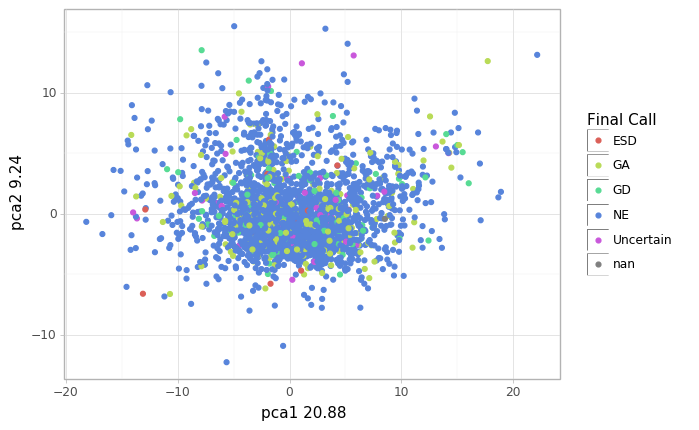

<ggplot: (8757991919849)>

In [20]:
(ggplot(lfc, aes(x='pca1', y='pca2', color='Final Call')) 
 + geom_point() 
 + theme_light() 
 + xlab(f'pca1 {np.round(explained_var[0], 2)}') 
 + ylab(f'pca2 {np.round(explained_var[1], 2)}')
)

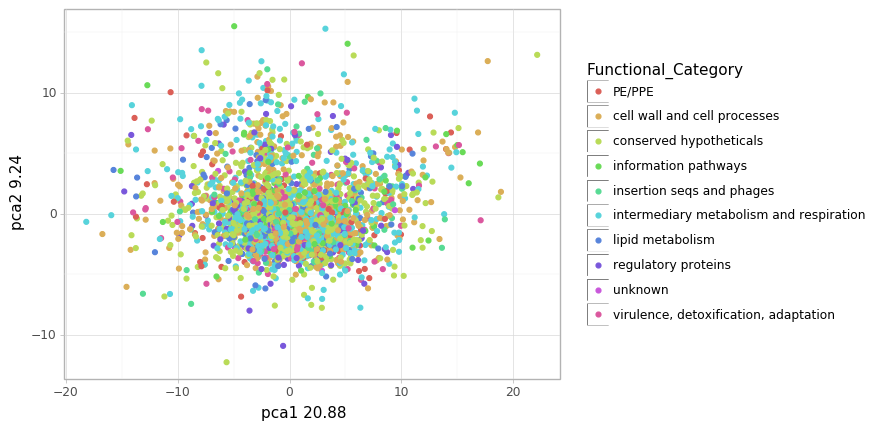

<ggplot: (8757991924477)>

In [21]:
(ggplot(lfc, aes(x='pca1', y='pca2', color='Functional_Category'))
 +geom_point()
 +theme_light()
 +xlab(f'pca1 {np.round(explained_var[0], 2)}')
 +ylab(f'pca2 {np.round(explained_var[1], 2)}'))

In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2).fit_transform(lfc[value_cols])

In [26]:
tsne = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])

In [27]:
lfc=lfc.merge(tsne, left_index=True, right_index=True)

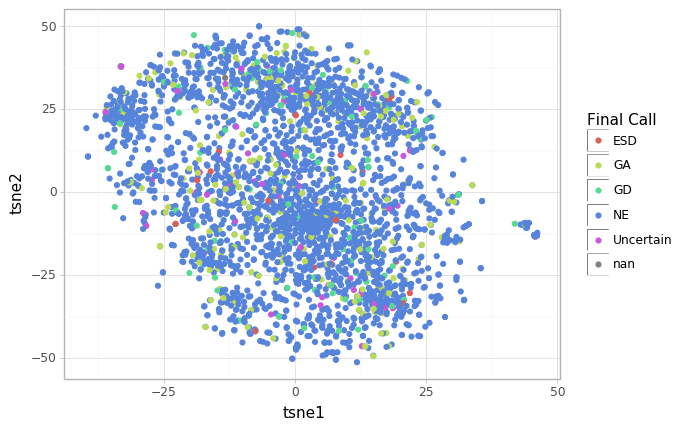

<ggplot: (8757993756885)>

In [28]:
(ggplot(lfc, aes(x='tsne1', y='tsne2', color='Final Call'))+geom_point()+theme_light())

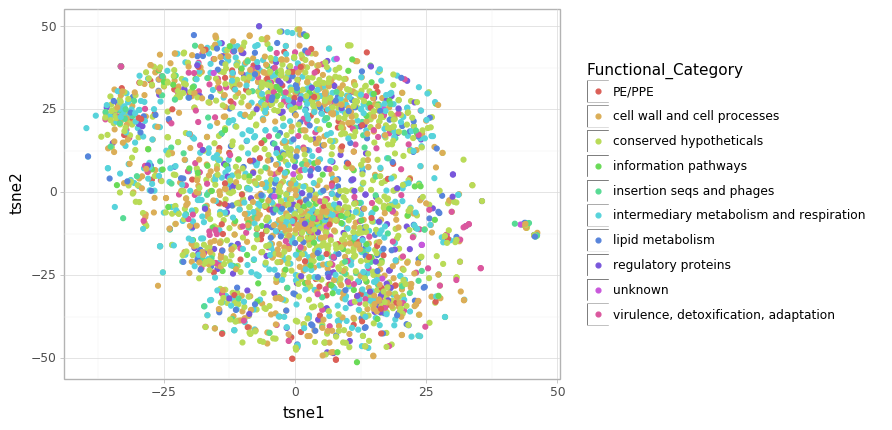

<ggplot: (8757993321281)>

In [29]:
(ggplot(lfc, aes(x='tsne1', y='tsne2', color='Functional_Category'))+geom_point()+theme_light())

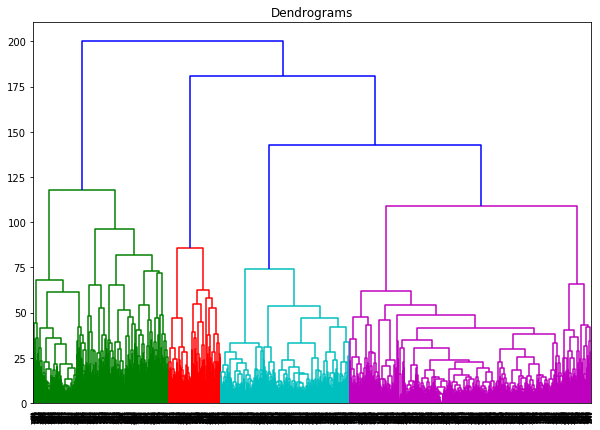

In [30]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(lfc[value_cols], method='ward'))

In [31]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(lfc[value_cols])

In [32]:
lfc['y_hc']=y_hc

In [33]:
lfc

,Rv_ID,Name,Description,Final Call,Functional_Category,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,...,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,pca1,pca2,pca3,tsne1,tsne2,y_hc
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways,-0.03,-0.08,0.03,-1.20,0.39,...,1.30,-0.49,-1.26,-2.25,-4.950952,15.492798,-5.795328,-2.954703,-37.449520,4
3,Rv0004,-,hypothetical protein,NE,conserved hypotheticals,-3.81,-3.39,-2.60,-6.83,1.54,...,0.00,0.70,-2.62,-2.62,3.070705,-1.304338,4.264816,7.104335,13.677279,1
6,Rv0007,-,Possible conserved membrane protein,NE,cell wall and cell processes,-0.44,-0.14,-0.47,-1.21,-0.34,...,-0.90,3.05,-2.77,-7.24,-2.881420,5.918736,1.757096,-10.030735,-35.892639,1
7,Rv0008c,-,Possible membrane protein,NE,cell wall and cell processes,-0.22,-0.00,0.43,-0.51,0.58,...,-0.26,0.44,2.11,0.59,-2.784371,3.149746,-3.344396,5.770246,-45.295433,0
8,Rv0009,ppiA,Probable iron-regulated peptidyl-prolyl cis-tr...,NE,information pathways,-0.13,-0.12,-0.10,0.78,0.11,...,0.26,1.99,-1.39,-4.10,0.614306,6.254284,0.912764,-15.282796,-41.005184,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,Rv3067,-,hypothetical protein,NE,conserved hypotheticals,-0.59,-0.56,-0.18,0.61,-0.15,...,0.45,1.10,-0.69,-0.10,3.269789,-3.560078,-2.373238,-6.306309,33.043079,0
3101,Rv3068c,pgmA,Probable phosphoglucomutase PgmA (glucose phos...,NE,intermediary metabolism and respiration,-0.27,-0.36,0.15,0.27,0.25,...,0.77,-0.92,-0.47,0.98,0.892436,-2.657974,2.576500,-17.522808,-13.899014,3
3102,Rv3069,-,Probable conserved transmembrane protein,NE,cell wall and cell processes,-0.04,-0.21,-0.10,0.28,0.31,...,-0.27,1.71,-0.17,0.42,0.061389,-0.751927,1.030789,-14.354908,-15.262091,4
3103,Rv3070,-,Probable conserved integral membrane protein,NE,cell wall and cell processes,0.02,-0.37,0.25,0.80,0.42,...,-0.87,0.76,0.13,-1.36,0.605333,-0.093693,1.957910,0.139246,-0.859891,0


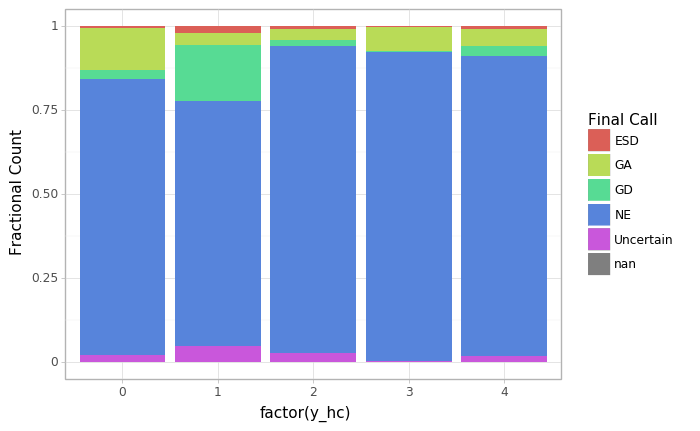

<ggplot: (8757993353817)>

In [34]:
(ggplot(lfc, aes(x='factor(y_hc)'))+geom_bar(aes(fill='Final Call'), position='fill')+theme_light()+ylab('Fractional Count'))

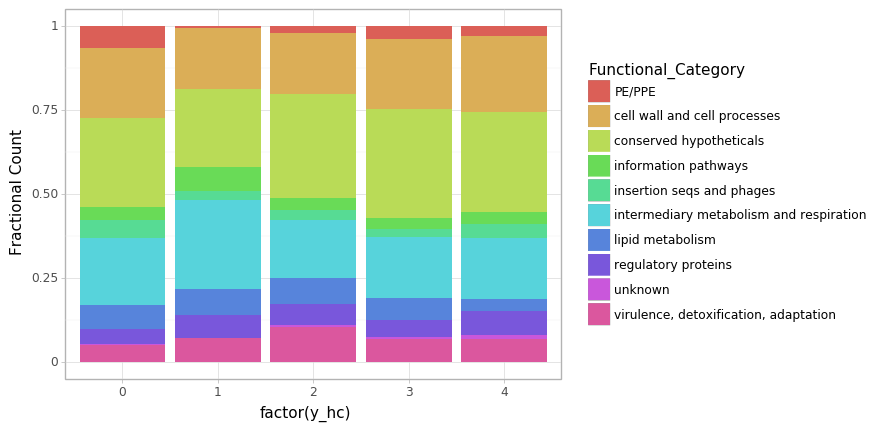

<ggplot: (8757992030449)>

In [35]:
(ggplot(lfc, aes(x='factor(y_hc)'))+geom_bar(aes(fill='Functional_Category'), position='fill')+theme_light()+ylab('Fractional Count'))

In [36]:
lfc.to_csv('results/clustering_lfc_genes_minus_essentials.csv', index=False)